<a href="https://colab.research.google.com/github/nikhilbansal23/Crop-Recommendation/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Crop Recommendation/Crop_recommendation.csv')



'N': This likely represents the amount of nitrogen present. In contexts such as agriculture or environmental science, nitrogen levels are crucial as they affect plant growth and soil fertility.

'P': This usually refers to phosphorus levels. Phosphorus is another essential nutrient for plants, vital for processes like photosynthesis, energy transfer, and cell division.

'K': This typically denotes the level of potassium.
Potassium is important for plant growth and plays a key role in functions like enzyme activation, photosynthesis, and water uptake.

'temperature': This refers to the measurement of how hot or cold something is. In agricultural contexts, temperature can affect plant growth, crop yields, and various biological processes.

'humidity': This indicates the amount of moisture present in the air. Humidity levels influence plant transpiration rates, disease susceptibility, and overall environmental conditions.

'ph': This represents the pH level, which measures the acidity or alkalinity of a solution. Soil pH is crucial for plant nutrient availability and can significantly impact crop productivity.
'rainfall': This signifies the amount of precipitation that occurs over a specific area within a given period. Rainfall is essential for supplying water to crops and sustaining agricultural activities.

'label': This could be a categorical variable indicating different classes or categories. In an agricultural context, it might represent different types of crops, crop health status, or other relevant classifications used for analysis or prediction.

In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

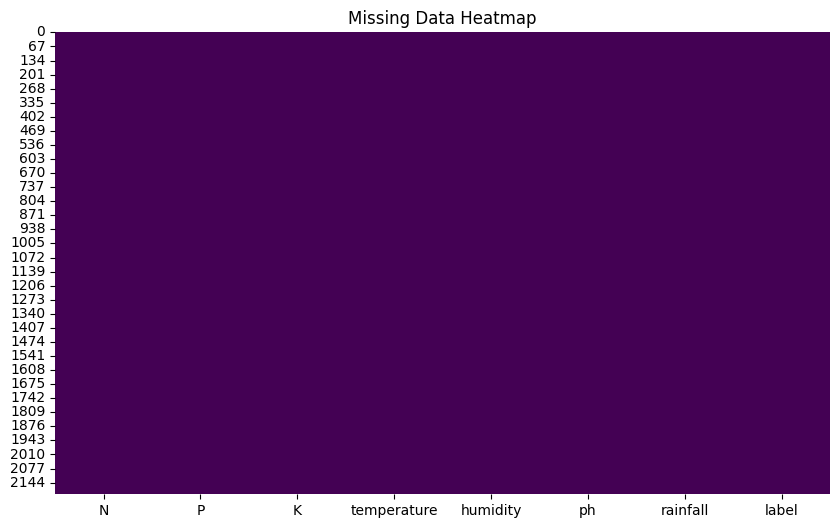

In [5]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
summary_stats = df.describe()
print(summary_stats)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


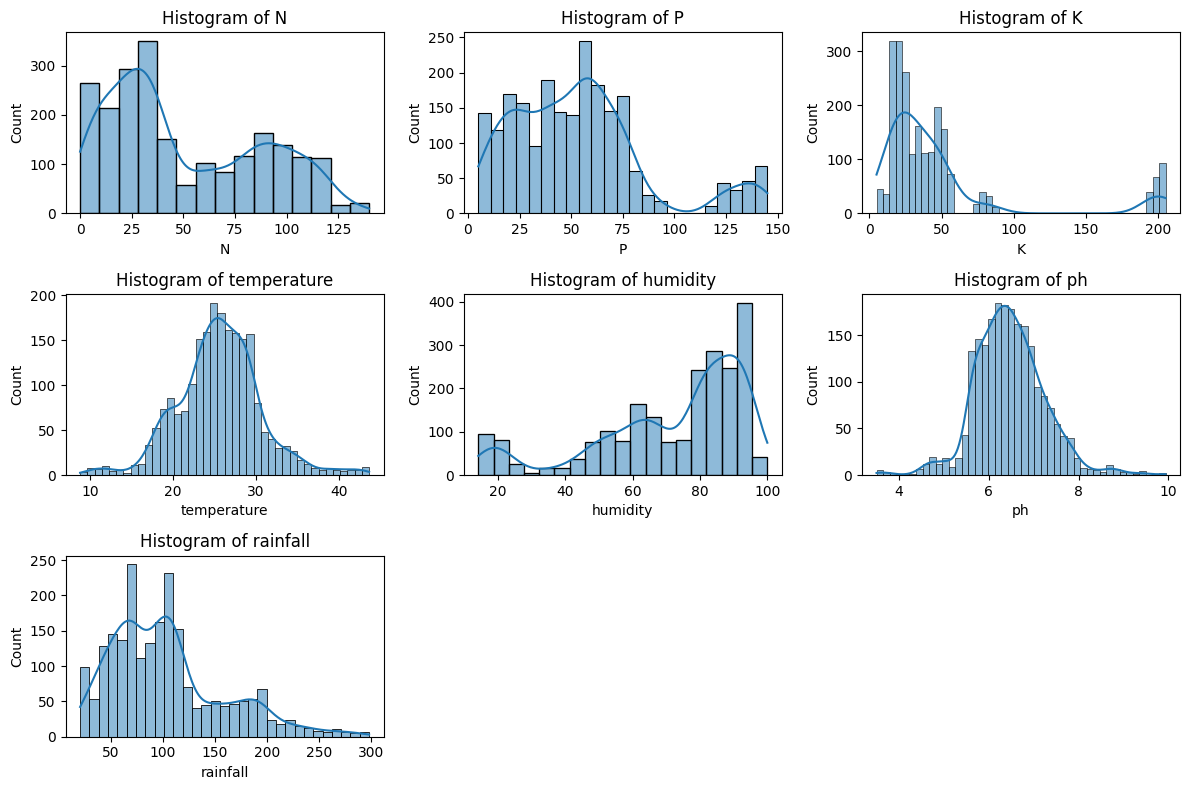

In [9]:
# Histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude the 'label' column
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot matrix
sns.pairplot(df.drop('label', axis=1))
plt.show()

In [ ]:
# Box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Assuming you already have the 'df' DataFrame loaded from the previous example

# Bar plot showing average rainfall for each crop type
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='rainfall', data=df)
plt.title('Average Rainfall for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall')
plt.xticks(rotation=45)
plt.show()

# Box plot showing distribution of rainfall for each crop type
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='rainfall', data=df)
plt.title('Distribution of Rainfall for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall')
plt.xticks(rotation=45)
plt.show()